In [1]:
import json
import os
import numpy as np
import pandas as pd
import requests
import browser_cookie3
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
if not os.path.exists('input13'):
    cookies = browser_cookie3.firefox(domain_name="adventofcode.com")
    session_cookie = [c for c in list(cookies) if c.name == "session"][0].value
    resp = requests.get('https://adventofcode.com/2021/day/13/input', cookies={'session': session_cookie})
    with open('input13', 'w') as f:
        f.write(resp.text)

In [12]:
with open('input13', 'r') as f:
    lines = [l.strip() for l in f.readlines()]

## Part 1

In [4]:
lines = [
    '6,10',
    '0,14',
    '9,10',
    '0,3',
    '10,4',
    '4,11',
    '6,0',
    '6,12',
    '4,1',
    '0,13',
    '10,12',
    '3,4',
    '3,0',
    '8,4',
    '1,10',
    '2,14',
    '8,10',
    '9,0',
    '',
    'fold along y=7',
    'fold along x=5',
]

In [10]:
xs = []
ys = []
for line in lines:
    if len(line) == 0:
        break
    x, y = line.split(',')
    xs.append(int(x))
    ys.append(int(y))

grid = np.zeros((max(ys) + 1, max(xs) + 1))
for x, y in zip(xs, ys):
    grid[y, x] = 1

folds = []
for line in lines:
    if line.startswith('fold along'):
        folds.append(line[11:])

In [11]:
for fold in folds:
    value = int(fold[2:])
    if fold.startswith('x='):
        # Fold left
        new_grid = grid[:,:value]
        flipped = np.fliplr(grid[:,value+1:])
        new_grid[:,value-flipped.shape[1]:] += flipped
    else:
        # Fold up
        new_grid = grid[:value,:]
        flipped = np.flipud(grid[value+1:,:])
        new_grid[value-flipped.shape[0]:,:] += flipped
    grid = (new_grid > 0).astype('int')
    break
grid.sum()

684

## Part 2

In [13]:
xs = []
ys = []
for line in lines:
    if len(line) == 0:
        break
    x, y = line.split(',')
    xs.append(int(x))
    ys.append(int(y))

grid = np.zeros((max(ys) + 1, max(xs) + 1))
for x, y in zip(xs, ys):
    grid[y, x] = 1

folds = []
for line in lines:
    if line.startswith('fold along'):
        folds.append(line[11:])

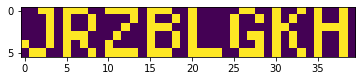

In [14]:
for fold in folds:
    value = int(fold[2:])
    if fold.startswith('x='):
        # Fold left
        new_grid = grid[:,:value]
        flipped = np.fliplr(grid[:,value+1:])
        new_grid[:,value-flipped.shape[1]:] += flipped
    else:
        # Fold up
        new_grid = grid[:value,:]
        flipped = np.flipud(grid[value+1:,:])
        new_grid[value-flipped.shape[0]:,:] += flipped
    grid = (new_grid > 0).astype('int')
plt.imshow(grid)
plt.show()